In [4]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt

In [5]:
cascPath = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

In [6]:
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

In [17]:
def face_detect(path_to_image):
  
    frame = cv2.imread(path_to_image)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        #face_region = cv2.GetSubRect(image,(x, y, x+w, y+h))
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        face_region = frame[y:y+h, x:x+w]
        converted = cv2.cvtColor(face_region, cv2.COLOR_BGR2HSV)
        skinMask = cv2.inRange(converted, lower, upper)

        # apply a series of erosions and dilations to the mask
        # using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        skinMask = cv2.erode(skinMask, kernel, iterations = 2)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

        # blur the mask to help remove noise, then apply the
        # mask to the frame
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        skin = cv2.bitwise_and(face_region, face_region, mask = skinMask)

        #cv2.imshow("Face", np.hstack([face_region, skin]))
        plt.imshow(np.hstack([skin]))
        plt.title('my picture')
        plt.show()
        cv2.imwrite(path_to_image+'crp.jpg',np.hstack([skin]))
        # Further processing on only the face without the background.

        #cv2.ellipse(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    plt.imshow(frame)
    plt.title('my picture')
    plt.show()

    
    # Save the resulting frams
    # cv2.imwrite(path_to_image+'crp.jpg',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        return


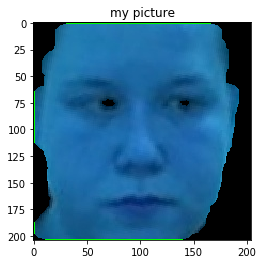

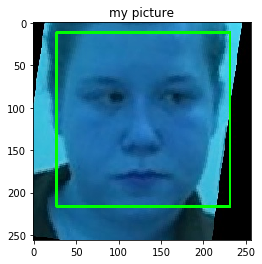

In [18]:
image_path = 'dataset1l.jpg'
face_detect(image_path)